In [3]:
import seaborn as sns 
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np 

from metrics import accuracy_report

In [4]:
def barplot(csvs, level, x_name, hue_name, title=None):
    # consolidate data from different csvs 
    all_dfs = []
    for csv in csvs:
        df = pd.read_csv(csv)
        print(csv, len(df))
        all_dfs.append(df)

    reports = [accuracy_report(df) for df in all_dfs]
    data = [report[level] for report in reports]
    df_to_plot = pd.DataFrame(columns=["model", "acc", "type"], dtype=object)
    for i, data_dict in enumerate(data):
        df = all_dfs[i]
        model_name = df['model'][0]
        if type(data_dict) == dict:
            for k, v in data_dict.items():
                acc = float(v[0])
                type_name = k
                df_to_plot = df_to_plot.append({"model": model_name, "acc": acc, "type": type_name}, ignore_index=True)
        else:
            v, __, __, __ = data_dict
            acc = float(v) 
            type_name = "total"
            df_to_plot = df_to_plot.append({"model": model_name, "acc": acc, "type": type_name}, ignore_index=True)

    g = sns.catplot(data = df_to_plot, kind='bar', x = x_name, y = 'acc', hue = hue_name, palette="colorblind")
    g.ax.set_ylim(top=1.0, bottom=0.0)
    [plt.setp(ax.get_xticklabels(), rotation=45) for ax in g.axes.flat]
    if title is not None:
        g.fig.suptitle(title)
    
    return g 

In [1]:
# recompute everything 
import json 
import pathlib 
from experiment import Experiment
prompt=None
wrapper_fxn=None
nicknames = json.load(open("../data/nicknames.json"))
csvs = ["../results/gpt_object_control_swap_names.csv", 
     "../results/gpt_neo_1.3B_object_control.csv", 
     "../results/gpt_neo_2.7b_object_control.csv", 
     "../results/gpt_j_object_control.csv", 
     "../results/jurassic_object_control_swap_names.csv",
     "../results/jurassic_jumbo_object_control_swap_names.csv", 
     "../results/t5_qa_object_control.csv",
     "../results/t0_object_control.csv"]

names = ["gpt", "gpt-neo-1.3b", "gpt-neo-2.7b", "gpt-j", "jurassic-large", "jurassic-jumbo", "t5_qa", "t0"]
for csv, name in zip(csvs, names): 
    exp  = Experiment(name, "object-control", prompt, wrapper_fxn, 1, None)
    filename = pathlib.Path(csv).name
    exp.recover(csv)
    exp.recompute(nicknames)
    df = exp.format_results()
    df.to_csv(f"../results_to_plot/{filename}")


../results_to_plot/gpt_object_control_swap_names.csv 3000
../results_to_plot/gpt_neo_1.3B_object_control.csv 3000
../results_to_plot/gpt_neo_2.7b_object_control.csv 1500
../results_to_plot/gpt_j_object_control.csv 1500
../results_to_plot/jurassic_object_control_swap_names.csv 3000
../results_to_plot/t5_qa_object_control.csv 1500
../results_to_plot/t0_object_control.csv 1500


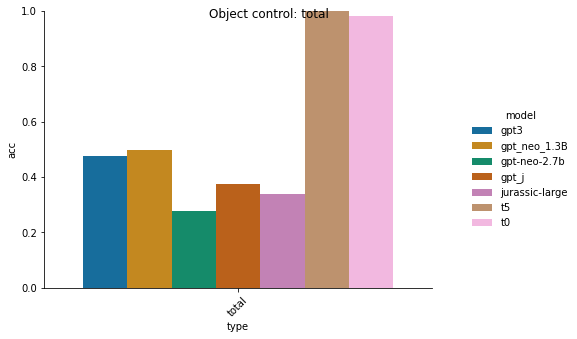

In [5]:
# fig, ax = plt.subplots(1,1)
csvs=["../results_to_plot/gpt_object_control_swap_names.csv", 
     "../results_to_plot/gpt_neo_1.3B_object_control.csv", 
     "../results_to_plot/gpt_neo_2.7b_object_control.csv", 
     "../results_to_plot/gpt_j_object_control.csv", 
     "../results_to_plot/jurassic_object_control_swap_names.csv", 
     "../results_to_plot/t5_qa_object_control.csv",
     "../results_to_plot/t0_object_control.csv"]

g = barplot(csvs, level="total", x_name = "type", hue_name = "model", title = "Object control: total")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

# g = barplot(csvs, level="acc_by_name", x_name = "type", hue_name = "model", title = "Object control by name")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()

# g = barplot(csvs, level="acc_by_verb", x_name = "type", hue_name = "model", title = "Object control by verb")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()

# g = barplot(csvs, level="acc_by_action", x_name = "type", hue_name = "model", title = "Object control by action")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()


In [8]:
# recompute everything 
import json 
import pathlib 
from experiment import Experiment
prompt=None
wrapper_fxn=None
nicknames = json.load(open("../data/nicknames.json"))
csvs = ["../results/gpt_passive_object_control_swap_names.csv", 
     "../results/gpt_neo_1.3B_passive_object_control.csv", 
     "../results/gpt_neo_2.7b_passive_object_control.csv", 
    #  "../results/gpt_j_passive_object_control.csv", 
     "../results/jurassic_passive_object_control_swap_names.csv",
     "../results/jurassic_jumbo_passive_object_control_swap_names.csv", 
     "../results/t5_passive_object_control.csv",
     "../results/t0_passive_object_control.csv"]

names = ["gpt", "gpt-neo-1.3b", "gpt-neo-2.7b", "gpt-j", "jurassic-large", "jurassic-jumbo", "t5_qa", "t0"]
for csv, name in zip(csvs, names): 
    exp  = Experiment(name, "object-control-passive", prompt, wrapper_fxn, 1, None)
    filename = pathlib.Path(csv).name
    exp.recover(csv)
    exp.recompute(nicknames)
    df = exp.format_results()
    df.to_csv(f"../results_to_plot/{filename}")


../results_to_plot/gpt_passive_object_control_swap_names.csv 3000
../results_to_plot/gpt_neo_1.3B_passive_object_control.csv 3000
../results_to_plot/gpt_neo_2.7b_passive_object_control.csv 3000
../results_to_plot/jurassic_passive_object_control_swap_names.csv 3000
../results_to_plot/t5_passive_object_control.csv 1500
../results_to_plot/t0_passive_object_control.csv 1500


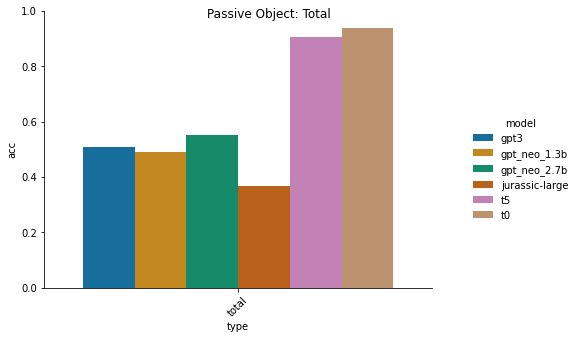

In [9]:

csvs=["../results_to_plot/gpt_passive_object_control_swap_names.csv", 
     "../results_to_plot/gpt_neo_1.3B_passive_object_control.csv",
     "../results_to_plot/gpt_neo_2.7b_passive_object_control.csv",
     "../results_to_plot/jurassic_passive_object_control_swap_names.csv", 
     "../results_to_plot/t5_passive_object_control.csv",
     "../results_to_plot/t0_passive_object_control.csv"]


g = barplot(csvs, level="total", x_name = "type", hue_name = "model", title = "Passive Object: Total")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()


# g = barplot(csvs, level="acc_by_name", x_name = "type", hue_name = "model", title = "Passive Object Control by Name")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()



# g = barplot(csvs, level="acc_by_verb", x_name = "type", hue_name = "model", title = "Passive Object Control by Verb")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()


# g = barplot(csvs, level="acc_by_action", x_name = "type", hue_name = "model", title = "Passive Object Control by Action")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()




In [12]:
# recompute everything 
import json 
import pathlib 
from experiment import Experiment
prompt=None
wrapper_fxn=None
nicknames = json.load(open("../data/nicknames.json"))
csvs = ["../results/gpt_subject_control_swap_names.csv", 
     "../results/gpt_neo_1.3B_subject_control.csv", 
     "../results/gpt_neo_2.7b_subject_control.csv", 
     "../results/gpt_j_subject_control.csv", 
     "../results/jurassic_subject_control_swap_names.csv",
     "../results/jurassic_jumbo_subject_control_swap_names.csv", 
     "../results/t5_qa_subject_control.csv",
     "../results/t0_subject_control.csv"]

names = ["gpt", "gpt-neo-1.3b", "gpt-neo-2.7b", "gpt-j", "jurassic-large", "jurassic-jumbo", "t5_qa", "t0"]
for csv, name in zip(csvs, names): 
    exp  = Experiment(name, "subject-control", prompt, wrapper_fxn, 1, None)
    filename = pathlib.Path(csv).name
    exp.recover(csv)
    exp.recompute(nicknames)
    df = exp.format_results()
    df.to_csv(f"../results_to_plot/{filename}")


../results/gpt_subject_control_swap_names.csv 300
../results/gpt_neo_1.3B_subject_control.csv 300
../results/gpt_neo_2.7b_subject_control.csv 300
../results/gpt_j_subject_control.csv 150
../results/jurassic_subject_control_swap_names.csv 300
../results/t5_qa_subject_control.csv 150
../results/t0_subject_control.csv 150


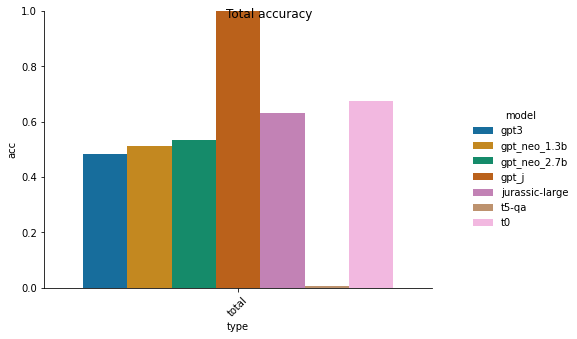

In [38]:

# fig, ax = plt.subplots(1,1)
csvs=["../results_to_plot/gpt_subject_control_swap_names.csv", 
     "../results_to_plot/gpt_neo_1.3B_subject_control.csv",
     "../results_to_plot/gpt_neo_2.7b_subject_control.csv", 
     "../results_to_plot/gpt_j_subject_control.csv",
     "../results_to_plot/jurassic_subject_control_swap_names.csv", 
     "../results_to_plot/t5_qa_subject_control.csv",
     "../results_to_plot/t0_subject_control.csv"]


g = barplot(csvs, level="total", x_name = "type", hue_name = "model", title = "Total accuracy")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

# g = barplot(csvs, level="acc_by_name", x_name = "type", hue_name = "model", title = "Subject Control by Name")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()

# g = barplot(csvs, level="acc_by_verb", x_name = "type", hue_name = "model", title = "Subject Control by Verb")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()

# g = barplot(csvs, level="acc_by_action", x_name = "type", hue_name = "model", title = "Subject Control by Action")
# g.figure.set_size_inches(8.5, 4.5)
# sns.despine()



In [ ]:

# fig, ax = plt.subplots(1,1)
csvs=["../results/gpt_gendered_subject_control_swap_names.csv", 
     "../results/jurassic_gendered_subject_control_swap_names.csv", 
     "../results/t5_gendered_subject_control_swap_names.csv"]


g = barplot(csvs, level="total", x_name = "type", hue_name = "model", title = "Total accuracy")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

g = barplot(csvs, level="acc_by_name", x_name = "type", hue_name = "model", title = "Subject Control by Name")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

g = barplot(csvs, level="acc_by_verb", x_name = "type", hue_name = "model", title = "Subject Control by Verb")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

g = barplot(csvs, level="acc_by_action", x_name = "type", hue_name = "model", title = "Subject Control by Action")
g.figure.set_size_inches(8.5, 4.5)
sns.despine()

